In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from genCo import getGenCos, plotResults 
from main import getFutureData
from utilsData import fuelDict, getISO

In [2]:
dfISO, numGenerators, totalCap, totalCSO = getISO()

Total Capacity:  38389.70230400001 Number of Generators:  2585


In [3]:
cap_rate = 1.0
# fuelMappingDict = dict(zip(dfISO['Technology'].tolist(), dfISO['Energy Source Code'].tolist()))
genCos = getGenCos(numGenerators, dfISO)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

{'Gas': 17494.84500000001, 'Hydro': 3385.012999999998, 'Waste': 734.3950000000001, 'Coal': 437.99999999999994, 'Oil': 3189.3289999999993, 'Nuclear': 3333.1130000000003, 'Wind': 559.6179999999999, 'Other': 25.72300000000001, 'Solar': 29.560000000000045}
{'Gas': 16789.169463635226, 'Hydro': 3021.7613211061675, 'Waste': 905.3828948468066, 'Coal': 525.5765625505721, 'Oil': 3336.0904103775715, 'Nuclear': 2908.0516502486926, 'Wind': 23406.01700601972, 'Other': 154.55335611494243, 'Solar': 41088.682864700815}
{'Gas': 17370.792000000016, 'Hydro': 3217.518000000001, 'Waste': 724.3919999999997, 'Coal': 437.99999999999994, 'Oil': 3196.8620000000005, 'Nuclear': 3333.1130000000003, 'Wind': 270.218, 'Other': 25.378000000000018, 'Solar': 401.54499999999973}
{'Gas': 16789.169463635226, 'Hydro': 3021.7613211061675, 'Waste': 905.3828948468066, 'Coal': 525.5765625505721, 'Oil': 3336.0904103775715, 'Nuclear': 2908.0516502486926, 'Wind': 23406.01700601972, 'Other': 154.55335611494243, 'Solar': 41088.682864

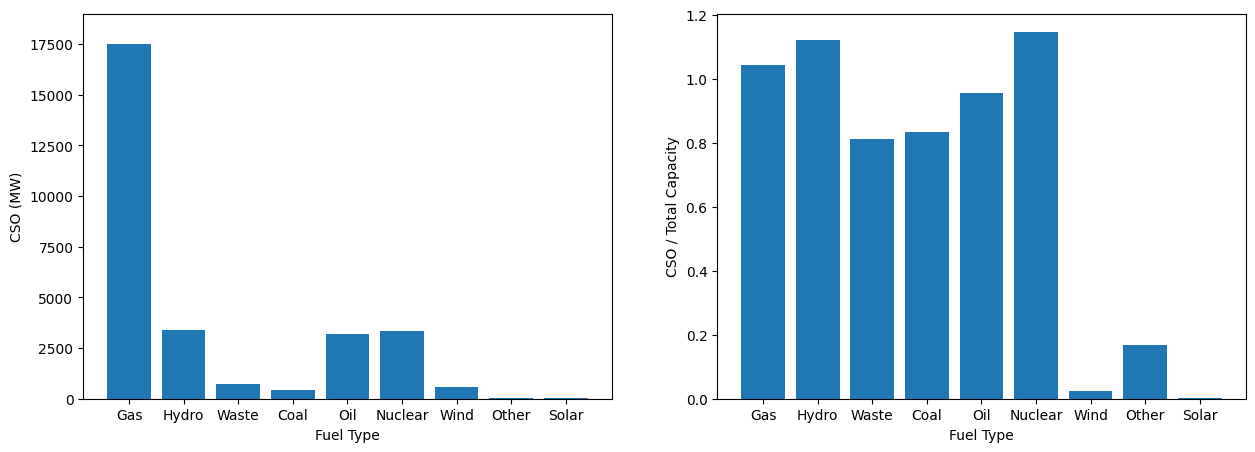

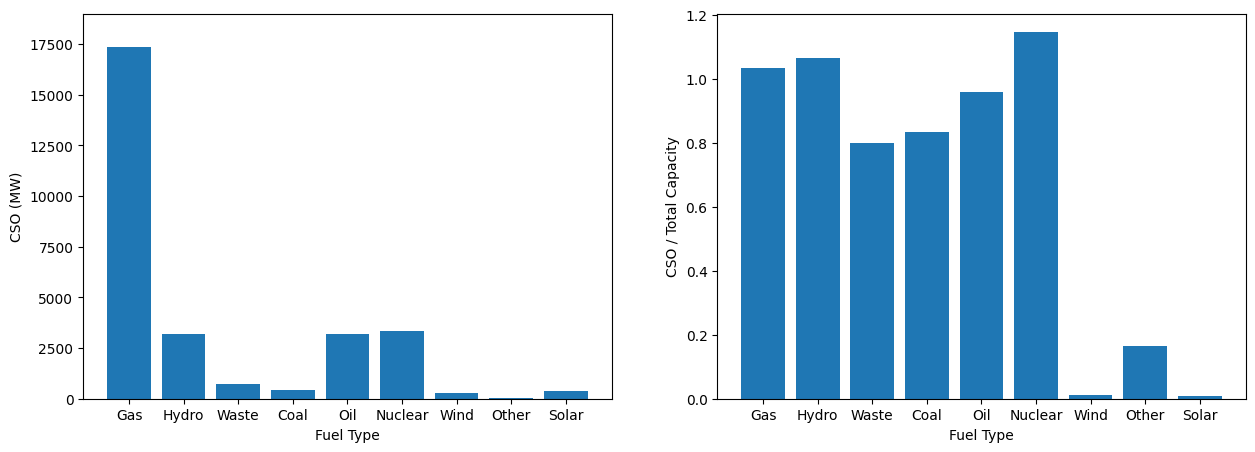

In [17]:
for month in ['January', 'July']:
    for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, [1, 1], month);
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    plt.bar(labels2, np.array(weights) / np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO / Total Capacity');

In [14]:
__, __, __, dfISO, info = getFutureData(ISO='ISNE', verbose=False, path='data/forecast/' , 
                                                                        load_rate='high', vre_mix='high')
numGenerators, totalCap, adjRatios, cap_rate, LOLE = info[0][0], info[1][0], info[2], info[3][0], info[4][0]
genCos = getGenCos(numGenerators, dfISO)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

{'Gas': 14106.137518993568, 'Hydro': 2729.3444944257, 'Waste': 592.1445353337676, 'Coal': 353.16050146881474, 'Oil': 2571.5639931256483, 'Nuclear': 2687.4973939091915, 'Wind': 8783.660073196621, 'Other': 20.740519587402567, 'Solar': 463.9682636435778}
{'Gas': 16789.169463635226, 'Hydro': 3021.7613211061675, 'Waste': 905.3828948468066, 'Coal': 525.5765625505721, 'Oil': 3336.0904103775715, 'Nuclear': 2908.0516502486926, 'Wind': 23406.01700601972, 'Other': 154.55335611494243, 'Solar': 41088.682864700815}
{'Gas': 14006.113273128958, 'Hydro': 2594.292854714473, 'Waste': 584.0790912785335, 'Coal': 353.16050146881474, 'Oil': 2577.637869969403, 'Nuclear': 2687.4973939091915, 'Wind': 4241.29148393912, 'Other': 20.46234521980727, 'Solar': 6302.575657129947}
{'Gas': 16789.169463635226, 'Hydro': 3021.7613211061675, 'Waste': 905.3828948468066, 'Coal': 525.5765625505721, 'Oil': 3336.0904103775715, 'Nuclear': 2908.0516502486926, 'Wind': 23406.01700601972, 'Other': 154.55335611494243, 'Solar': 41088.6

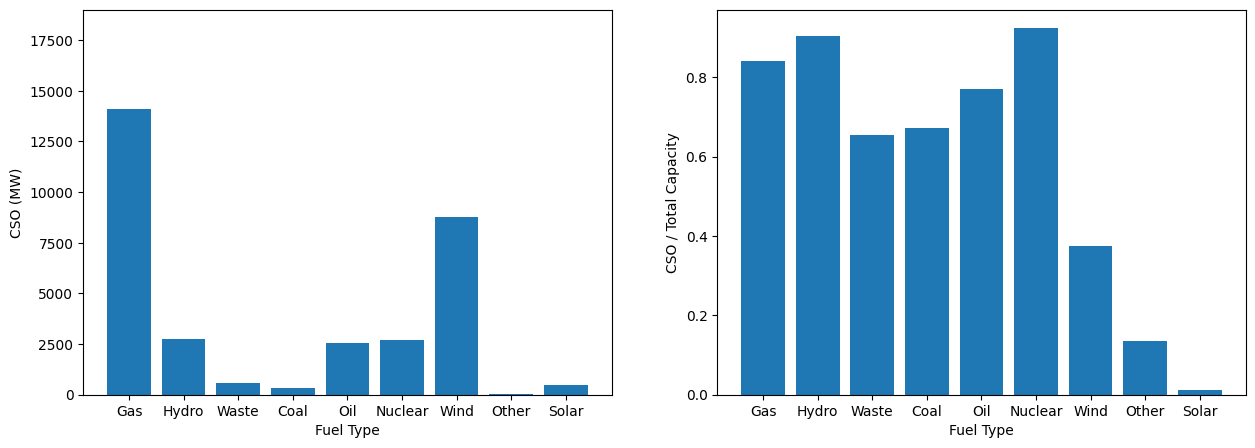

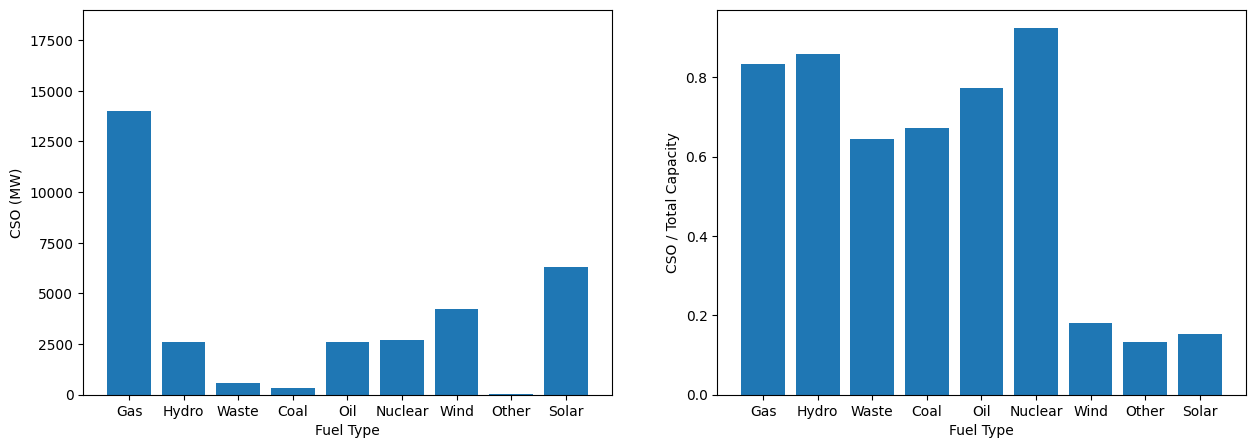

In [16]:
for month in ['January', 'July']:    
    for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, adjRatios, month);

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    plt.bar(labels2, np.array(weights) / np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO / Total Capacity');

In [9]:
import datetime

def plotData(dfHourlyLoad, dfHourlySolar, dfHourlyWind, totalCap, totalCSO, yearPlot="2023"):
    month, day, year = map(int,dfHourlyLoad.loc[0]['Date'].split('/'))
    start = datetime(year, month, day, int(dfHourlyLoad.loc[0]['Hour Ending']) - 1)
    month, day, year = map(int,dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Date'].split('/'))
    end =  datetime(year, month, day, int(dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Hour Ending']) - 1)

    timeRange = pd.date_range(start, end, periods=len(dfHourlyLoad))


    plt.plot(timeRange, dfHourlyLoad['Total Load'], label='Total Load')
    plt.plot(timeRange, dfHourlySolar['tot_solar_mwh'], label='Solar')
    plt.plot(timeRange, dfHourlyWind['tot_wind_mwh'], label='Wind')
    plt.plot(timeRange, totalCap * np.ones(len(dfHourlyLoad)), 'k--', label='Total Capacity')
    plt.plot(timeRange, totalCSO * np.ones(len(dfHourlyLoad)), 'k--', label='Total CSO')

    plt.xlabel('Date')
    plt.ylabel('Load (MW)')
    plt.title('Hourly Load of ' + yearPlot)
    plt.legend()